In [54]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def concat_csv_files(root_directory):
    # Dictionary to hold DataFrames keyed by filename
    dataframes = {}

    # Get all subdirectories in the root directory
    subdirectories = [os.path.join(root_directory, d) for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))]

    # Initialize a dictionary to store file paths by file name
    file_paths = {}

    # Loop over each directory and collect files
    for subdir in subdirectories:
        for file in os.listdir(subdir):
            if file.endswith('.csv'):  # Only process CSV files
                # Prepare the full path of the file
                full_path = os.path.join(subdir, file)
                # Append the path to the list for this file name
                if file not in file_paths:
                    file_paths[file] = []
                file_paths[file].append(full_path)

    print(file_paths)
    # Read and concatenate all files with the same name across directories
    for filename, paths in file_paths.items():
        # Read each file and store in a list
        dfs = [pd.read_csv(path) for path in paths]
        # Concatenate all DataFrames in the list
        concatenated_df = pd.concat(dfs)
        # Add a column to indicate the source file directory for each row
        concatenated_df['source_directory'] = [os.path.basename(os.path.dirname(path)) for path in paths for _ in range(len(pd.read_csv(path)))]
        # Store the concatenated DataFrame in the dictionary using the filename as the key
        dataframes[filename] = concatenated_df

    return dataframes

# Example usage
root_directory = 'eval_results'
result_dfs = concat_csv_files(root_directory)

# # Example to print the result DataFrames
# for filename, df in result_dfs.items():
#     print(f"DataFrame from {filename}:")
#     print(df.head())  # Just show the first few rows


{'format_accuracy.csv': ['eval_results/results_3point5_ft_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch3_result_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch3_result/format_accuracy.csv', 'eval_results/babbage-002_epoch4_result_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch4_result/format_accuracy.csv', 'eval_results/davinci_epoch3_result_detailedInstr/format_accuracy.csv', 'eval_results/results_3point5_og_detailedInstr/format_accuracy.csv'], 'confusion_matrix_overall_vibes_atmosphere.csv': ['eval_results/results_3point5_ft_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch3_result_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch3_result/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch4_result_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch4_result/confusion_m

In [36]:
result_dfs.keys()

dict_keys(['format_accuracy.csv', 'confusion_matrix_overall_vibes_atmosphere.csv', 'confusion_matrix_is_any_space_shared?.csv', 'metrics.csv', 'metrics_overall_vibes_atmosphere.csv', 'confusion_matrix_number_of_bedrooms.csv', 'confusion_matrix_type_of_property.csv'])

In [39]:
result_dfs['format_accuracy.csv']

,json_status,proportion,source_directory
0,Perfect,1.000000,results_3point5_ft_detailedInstr
0,Fixable,0.900000,babbage-002_epoch3_result_detailedInstr
1,Perfect,0.100000,babbage-002_epoch3_result_detailedInstr
0,Fixable,0.733333,babbage-002_epoch3_result
1,Perfect,0.266667,babbage-002_epoch3_result
0,Fixable,1.000000,babbage-002_epoch4_result_detailedInstr
0,Fixable,1.000000,babbage-002_epoch4_result
0,Fixable,1.000000,davinci_epoch3_result_detailedInstr
0,Perfect,1.000000,results_3point5_og_detailedInstr


In [46]:
result_dfs['metrics.csv']
# .to_clipboard(index=False)

,Unnamed: 0,Number of Bedrooms,Type of Property,Is any space shared?,Overall vibes/atmosphere,source_directory
0,accuracy,0.850000,0.691667,0.816667,0.575000,results_3point5_ft_detailedInstr
1,precision,0.696212,0.461607,0.846032,0.366209,results_3point5_ft_detailedInstr
2,recall,0.607879,0.462246,0.614473,0.383279,results_3point5_ft_detailedInstr
3,f1_score,0.608507,0.457990,0.603327,0.369699,results_3point5_ft_detailedInstr
0,accuracy,0.808333,0.691667,0.783333,0.508333,babbage-002_epoch3_result_detailedInstr
1,precision,0.684159,0.371684,0.489418,0.262636,babbage-002_epoch3_result_detailedInstr
2,recall,0.695942,0.370590,0.560762,0.262936,babbage-002_epoch3_result_detailedInstr
3,f1_score,0.670226,0.362056,0.520229,0.259437,babbage-002_epoch3_result_detailedInstr
0,accuracy,0.816667,0.658333,0.791667,0.500000,babbage-002_epoch3_result
1,precision,0.696172,0.337767,0.504610,0.253120,babbage-002_epoch3_result


In [43]:
# Create a plot for each category
def plot_metrics(data):
    # Define the categories and metrics
    categories = ['Number of Bedrooms', 'Type of Property', 'Is any space shared?', 'Overall vibes/atmosphere']
    metrics = ['accuracy', 'f1_score', 'precision', 'recall']

    for category in categories:
        plt.figure(figsize=(16, 10))
        for i, metric in enumerate(metrics, 1):
            plt.subplot(2, 2, i)
            # Filter data for the metric and the category
            filtered_data = data[data['Metrics'] == metric]
            sns.barplot(x='source_directory', y=category, data=filtered_data)
            plt.title(f'{metric} for {category}')
            plt.xticks(rotation=45)  # Rotate model names for better visibility
            plt.ylabel(metric)
            plt.xlabel('Model')

        plt.tight_layout()
        plt.show()

Index(['Unnamed: 0', 'Number of Bedrooms', 'Type of Property',
       'Is any space shared?', 'Overall vibes/atmosphere', 'source_directory'],
      dtype='object')

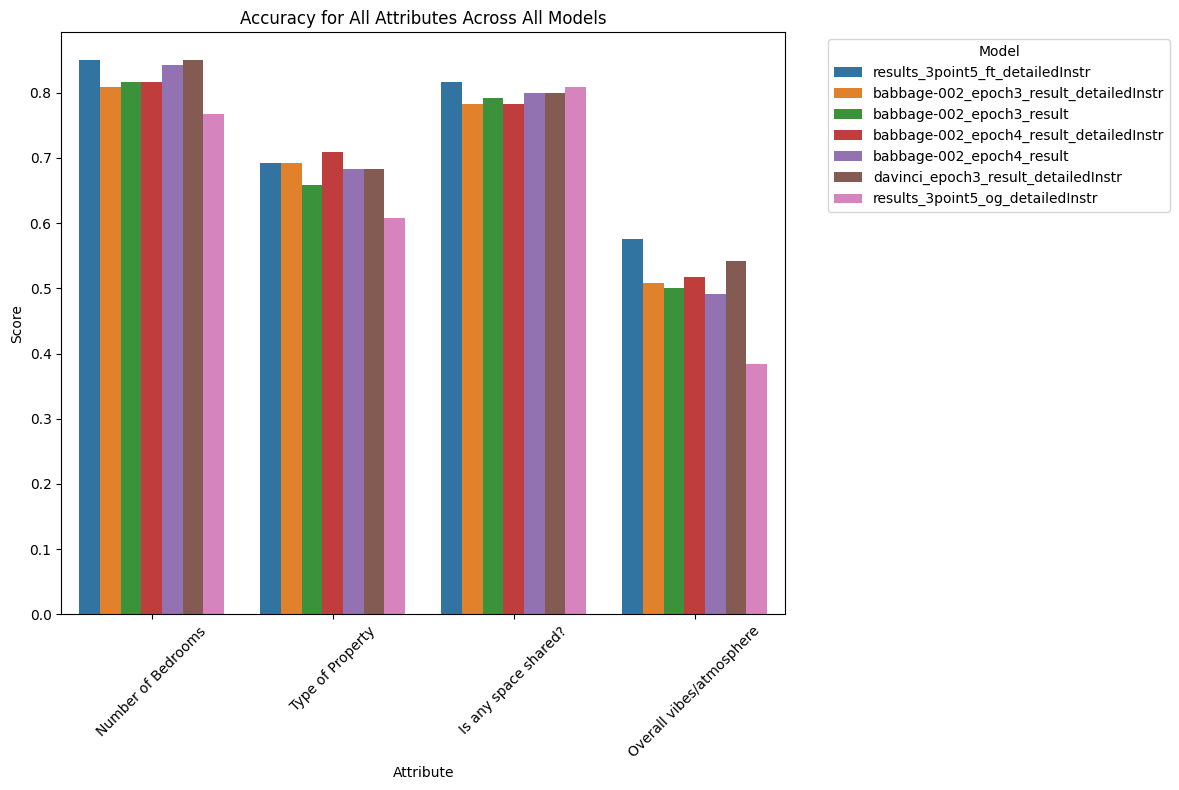

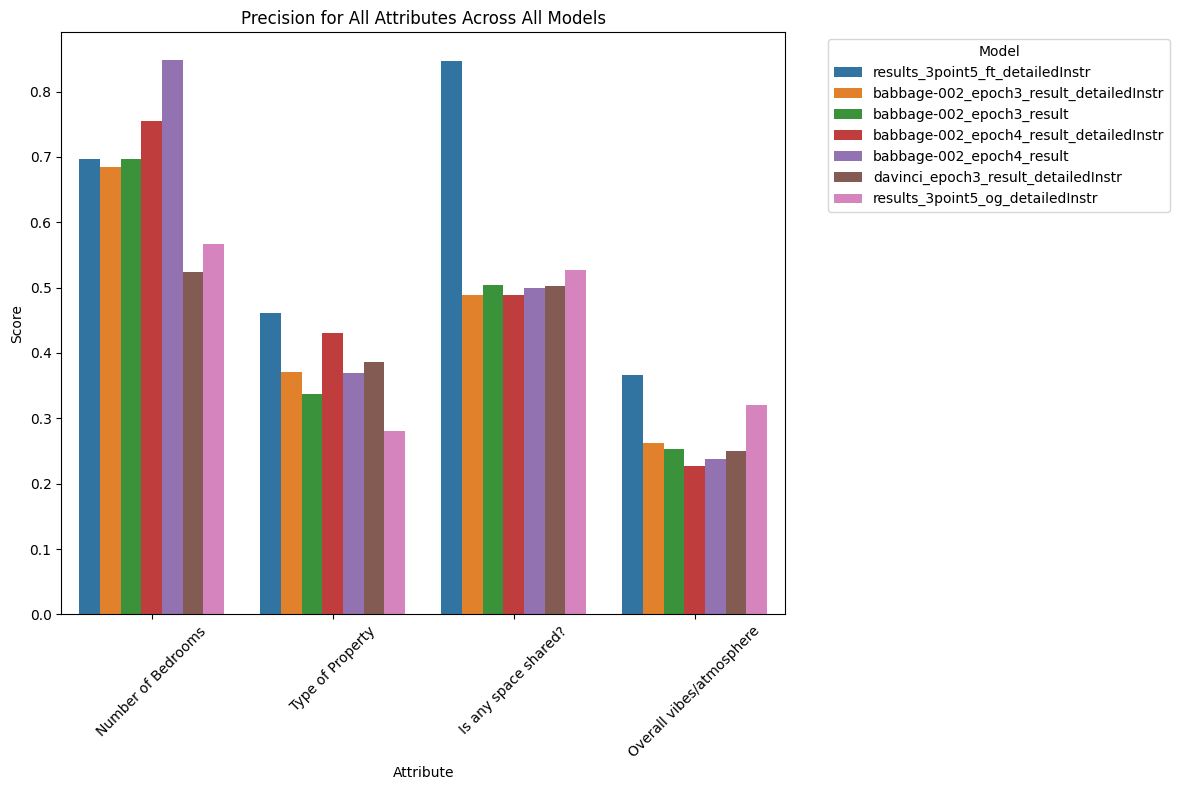

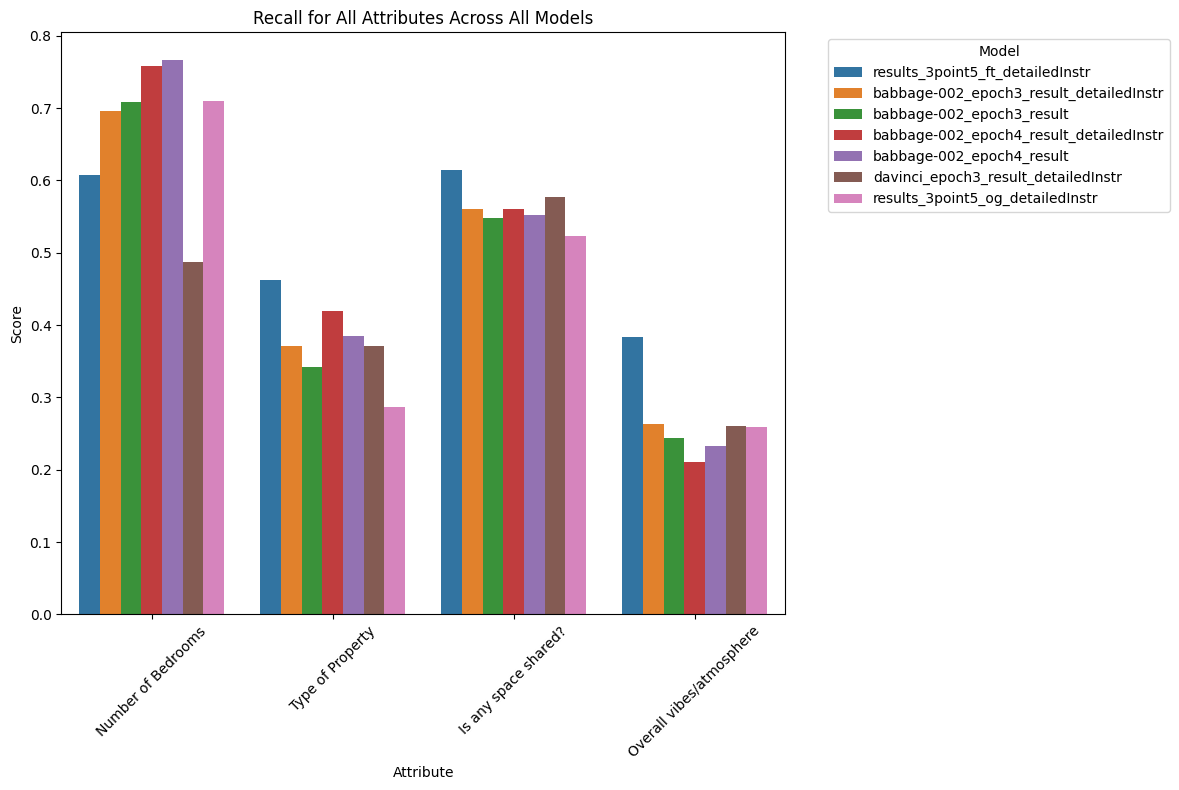

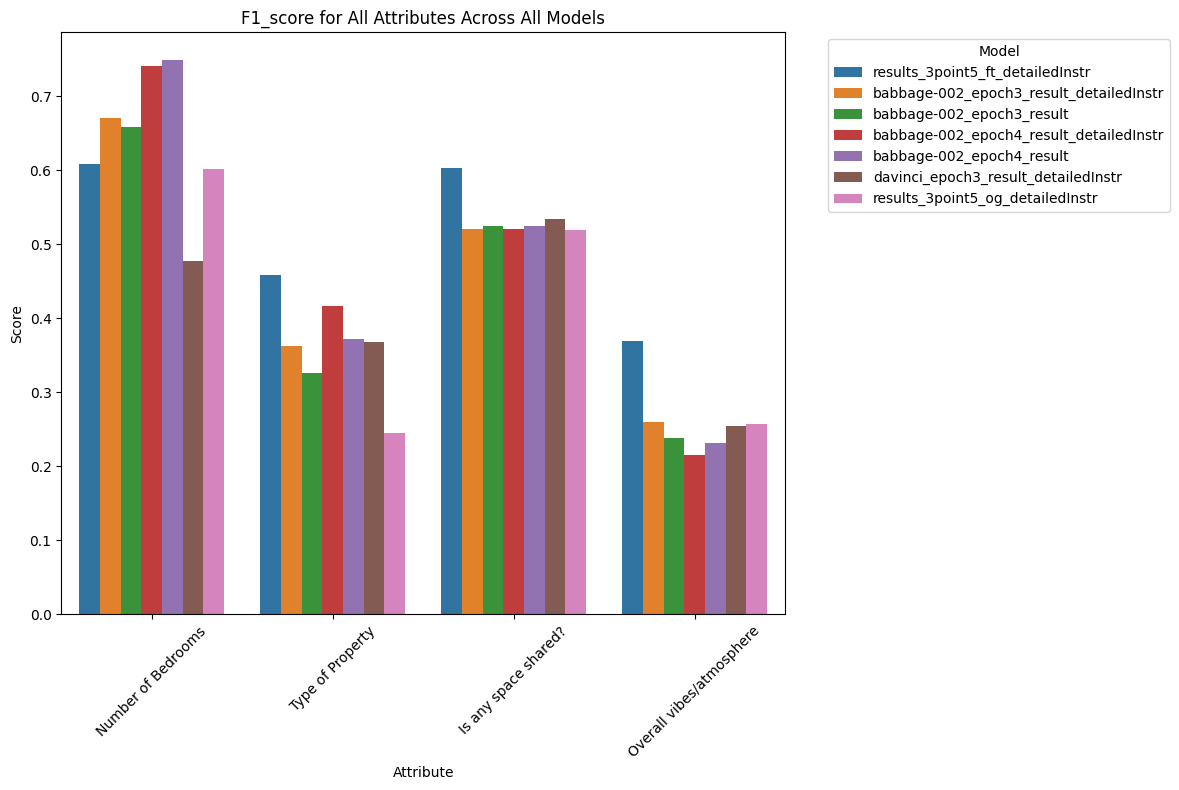

In [53]:
metrics_df = result_dfs['metrics.csv']
metrics_df.columns = ['Metrics', 'Number of Bedrooms', 'Type of Property',
       'Is any space shared?', 'Overall vibes/atmosphere', 'source_directory']

# Plotting function
def plot_grouped_metrics(data):
    # Melt the DataFrame to facilitate grouped bar plotting
    data = data.melt(id_vars=['Metrics', 'source_directory'], var_name='Attribute', value_name='Score')

    metrics = data['Metrics'].unique()
    for metric in metrics:
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Attribute', y='Score', hue='source_directory', data=data[data['Metrics'] == metric])
        plt.title(f'{metric.capitalize()} for All Attributes Across All Models')
        plt.ylabel('Score')
        plt.xlabel('Attribute')
        plt.xticks(rotation=45)
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

# Call the plotting function
plot_grouped_metrics(metrics_df)

In [55]:
result_dfs['eval_df.csv']

,Unnamed: 0,system,user,assistant,gt_text,index,gen_text,model,json_status,fixed_json,standardized_json,source_directory
0,0,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Gorgeous 2 bdrm i...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",0,"{""Number of Bedrooms"": ""2"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_ft_detailedInstr
1,1,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Wonderful B&B Sty...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",1,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
2,2,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Heavy Sun, Quiet,...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",2,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
3,3,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': ""Brooklyn Amazing ...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",3,"{""Number of Bedrooms"": ""2"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_ft_detailedInstr
4,4,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Spacious Greenwic...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",4,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': '2 Bedroom Gem - P...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",115,"{\n ""Number of Bedrooms"": ""2"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_og_detailedInstr
116,116,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Gorgeous Private ...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",116,"{\n ""Number of Bedrooms"": ""1"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_og_detailedInstr
117,117,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'room with very ni...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",117,"{\n ""Number of Bedrooms"": ""1"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_og_detailedInstr
118,118,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Clean&Serene in S...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'..